<a href="https://colab.research.google.com/github/GabyDs/EjerciciosInteligenciaComputacional/blob/main/Experiencia1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [390]:
# Importación, visualización, manipulación de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Transformación de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Métricas y desempeño
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, matthews_corrcoef # Diferentes métricas, hay más. Según el problema conviene mirar alguna o varias
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Grafica Matrix de confusión

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier # Multi-layer Perceptron classifier
from xgboost import XGBClassifier

import time

In [391]:
!pip install shap
# Utiliza cálculos del campo de la teoría de juegos para averiguar qué variables 
# tienen más influencia en las predicciones de las técnicas de machine learning
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [438]:
# Lectura del dataset
dataset = pd.read_csv("riesgo_crediticio.csv")

En la columna “Riesgo” se encuentra la clase que indica si el cliente paga (0) o no paga (1)

In [439]:
# Quitamos la columna id
dataset.pop('IdCliente')

0          1
1          2
2          3
3          4
4          5
        ... 
1995    1996
1996    1997
1997    1998
1998    1999
1999    2000
Name: IdCliente, Length: 2000, dtype: int64

In [440]:
# Primeras 5 filas
dataset.head()

,Ingresos,Edad,Hipoteca,Riesgo
0,66155.925095,59.017015,8106.532131,0
1,34415.153966,48.117153,6564.745018,0
2,57317.170063,63.108049,8020.953296,0
3,42709.534201,45.751972,6103.642260,0
4,66952.688845,18.584336,8770.099235,1


In [441]:
# Ultimas 5 filas
dataset.tail()

,Ingresos,Edad,Hipoteca,Riesgo
1995,59221.044874,48.518179,1926.729397,0
1996,69516.127573,23.162104,3503.176156,0
1997,44311.449262,28.017167,5522.786693,1
1998,43756.056605,63.971796,1622.722598,0
1999,69436.579552,56.152617,7378.833599,0


In [396]:
# Tipos de datos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ingresos  2000 non-null   float64
 1   Edad      1997 non-null   float64
 2   Hipoteca  2000 non-null   float64
 3   Riesgo    2000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 62.6 KB


In [397]:
# Genera los descriptores estadísticos básicos
dataset.describe()

,Ingresos,Edad,Hipoteca,Riesgo
count,2000.000000,1997.000000,2000.000000,2000.000000
mean,45331.600018,40.807559,4444.369695,0.141500
std,14326.327119,13.624469,3045.410024,0.348624
min,20014.489470,-52.423280,1.377630,0.000000
25%,32796.459717,28.990415,1939.708847,0.000000
50%,45789.117313,41.317159,3974.719419,0.000000
75%,57791.281668,52.587040,6432.410625,0.000000
max,69995.685578,63.971796,13766.051239,1.000000


In [445]:
dataset.shape

(2000, 4)

In [447]:
dataset.dtypes

Ingresos    float64
Edad        float64
Hipoteca    float64
Riesgo        int64
dtype: object

In [398]:
# Para obtener los valores nulos directamente
dataset.isna().sum()

Ingresos    0
Edad        3
Hipoteca    0
Riesgo      0
dtype: int64

In [399]:
# Mostramos las filas con edad nula
dataset[dataset['Edad'].isna()]

,Ingresos,Edad,Hipoteca,Riesgo
28,59417.805406,NaN,2082.625938,0
30,48528.852796,NaN,6155.784670,0
31,23526.302555,NaN,2862.010139,0


In [442]:
# Mostramos las filas con edad negativa
dataset[dataset['Edad'] < 0]

,Ingresos,Edad,Hipoteca,Riesgo
15,50501.726689,-28.218361,3977.287432,0
21,32197.620701,-52.423280,4244.057136,0
26,63287.038908,-36.496976,9595.286289,0


In [463]:
# Calculamos la mediana de la columna edad omitiendo estos valores
# Los valores NaN se omiten con la misma condicion que los negativos
dataset_sin_nulos = dataset[dataset['Edad'] > 0]
edad_sin_nulos = dataset_sin_nulos['Edad']
mediana = edad_sin_nulos.median()

In [465]:
dataset_sin_nulos.isna().sum()

Ingresos    0
Edad        0
Hipoteca    0
Riesgo      0
dtype: int64

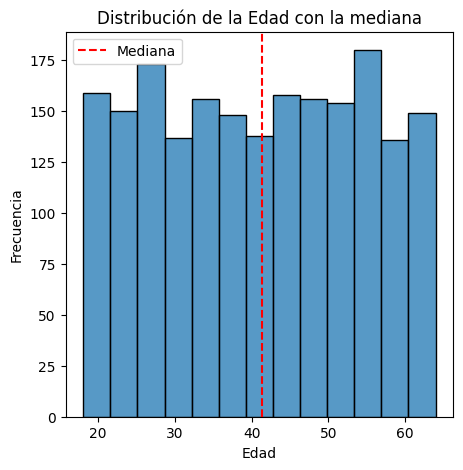

In [464]:
# Vemos la distribucion de los datos
sns.histplot(edad_sin_nulos, kde=False)
plt.axvline(mediana, color='red', linestyle='dashed', label='Mediana') # Agregar una línea vertical para mostrar la mediana
plt.legend()
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad con la mediana')
plt.show()

In [467]:
# Vemos la mediana de la edad segun el Riesgo
pagan = dataset_sin_nulos['Edad'][dataset_sin_nulos['Riesgo'] == 0]
no_pagan = dataset_sin_nulos['Edad'][dataset_sin_nulos['Riesgo'] == 1]

mediana_pagan = pagan.median()
mediana_no_pagan = no_pagan.median()

print(f"Pagan: {mediana_pagan}, No pagan: {mediana_no_pagan}, Total: {mediana}")

Pagan: 44.3926223418675, No pagan: 26.4493368398398, Total: 41.3826734491158


In [468]:
# Habiamos visto anteriormente que estos valores nulos tienen un Riesgo 0
# por ende los reemplazamos con la mediana de la edad correspondiente

dataset['Edad'].fillna(mediana_pagan, inplace=True)
dataset.loc[dataset["Edad"] < 0, "Edad"] = mediana_pagan

In [469]:
dataset.isna().sum()

Ingresos    0
Edad        0
Hipoteca    0
Riesgo      0
dtype: int64

In [470]:
# La media nos daba una edad negativa, checamos eso
dataset[dataset['Edad'] < 0]

,Ingresos,Edad,Hipoteca,Riesgo


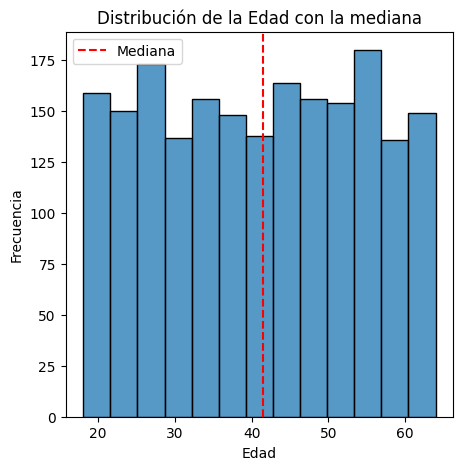

In [472]:
# Vemos la distribucion de los datos con el reemplazo hecho
sns.histplot(dataset['Edad'], kde=False)
plt.axvline(dataset['Edad'].median(), color='red', linestyle='dashed', label='Mediana') # Agregar una línea vertical para mostrar la mediana
plt.legend()
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad con la mediana')
plt.show()

Observamos que la distribucion no cambia

# Correlacion entre variables

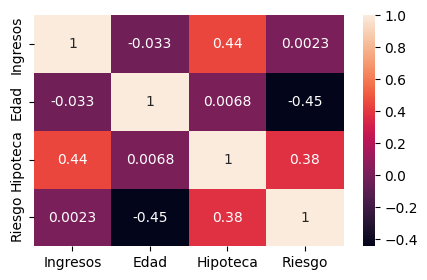

In [477]:
# Mapa de correlaciones, se puede observar dependencias entre columnas. Permite descartar descriptores que no aportan información nueva por ejemplo (resta costo computacional, etc.)
sns.heatmap(data=dataset.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

# De momento todas las variables estan moderadamente correlacionadas
# Aunque Edad este inversamente correlacionada con Ingresos y el Riesgo

Podemos observar una correlacion negativa entre Edad y Riesgo, es decir, a medida que crece la variable Edad, disminuye el Riesgo.
Eso se puede observar en la edad media de los clientes que no pagan, son mas jovenes que los clientes que si pagan

## Observamos las distribuciones respecto a la variable de salida

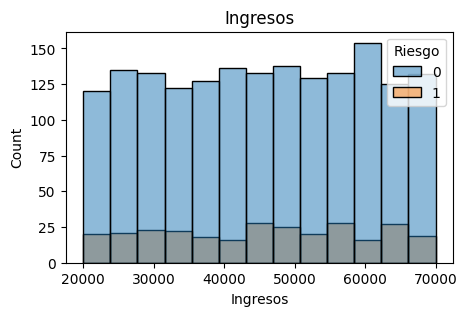

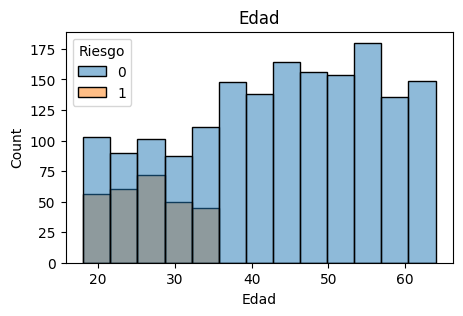

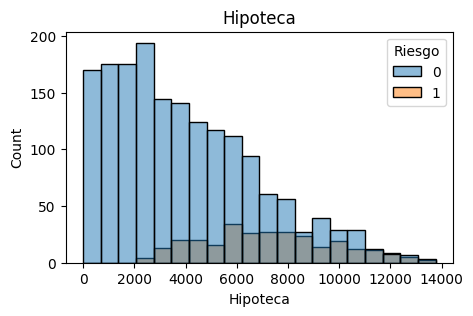

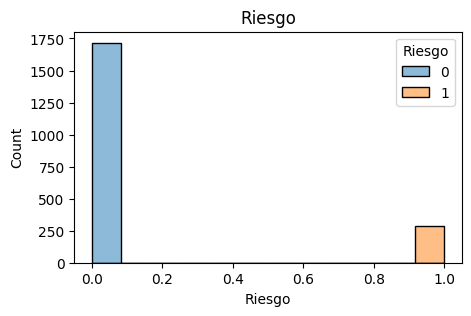

In [488]:
for col in dataset.columns:
  plt.rcParams['figure.figsize'] = (5, 3)
  plt.title(col)
  sns.histplot(data=dataset, x = col, hue='Riesgo')
  plt.show()

Podemos observar en las graficas anteriores, que a menor edad
mayor es el riesgo de que no paguen, al igual que a mayor hipoteca
mayor el indice de riesgo

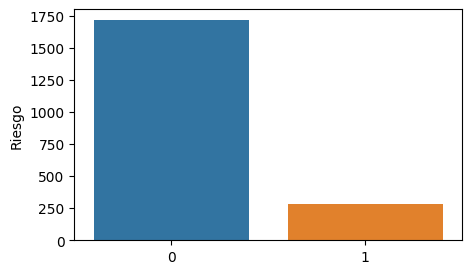

In [489]:
# Como se menciona anteriormente, el dataset esta desbalanceado
# Puede suponer un problema al entrenar el clasificador

plt.rcParams['figure.figsize'] = (5,3)
sns.barplot(x = dataset['Riesgo'].unique(), y = dataset['Riesgo'].value_counts());

# Correlacion

Podemos ver las correlaciones entre todas las variables en relacion al Riesgo

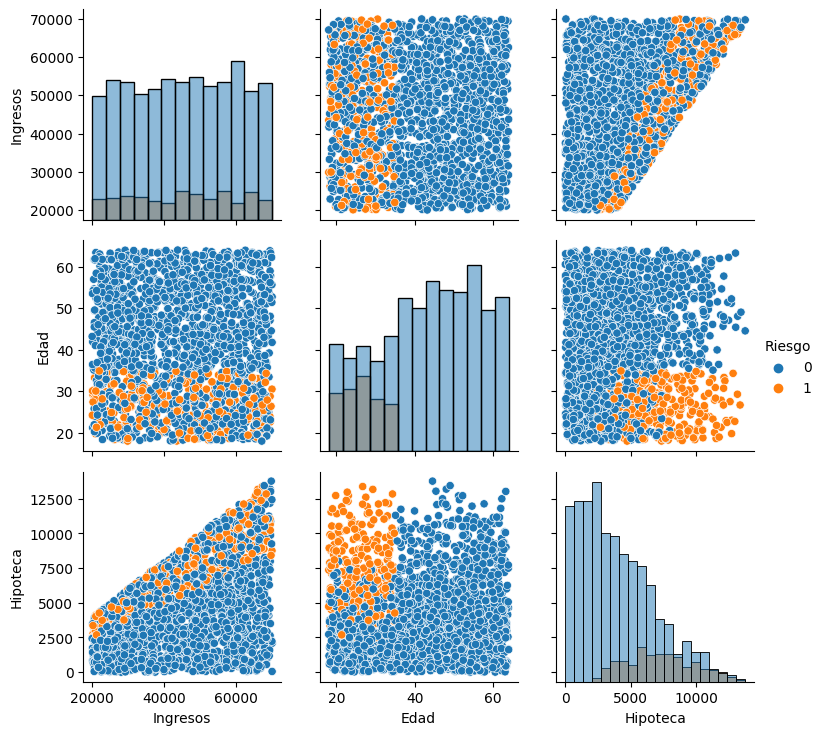

In [490]:
g = sns.PairGrid(dataset, hue="Riesgo")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

# Identificamos los Outliers
Utilizando diagramas de cajas y bigotes

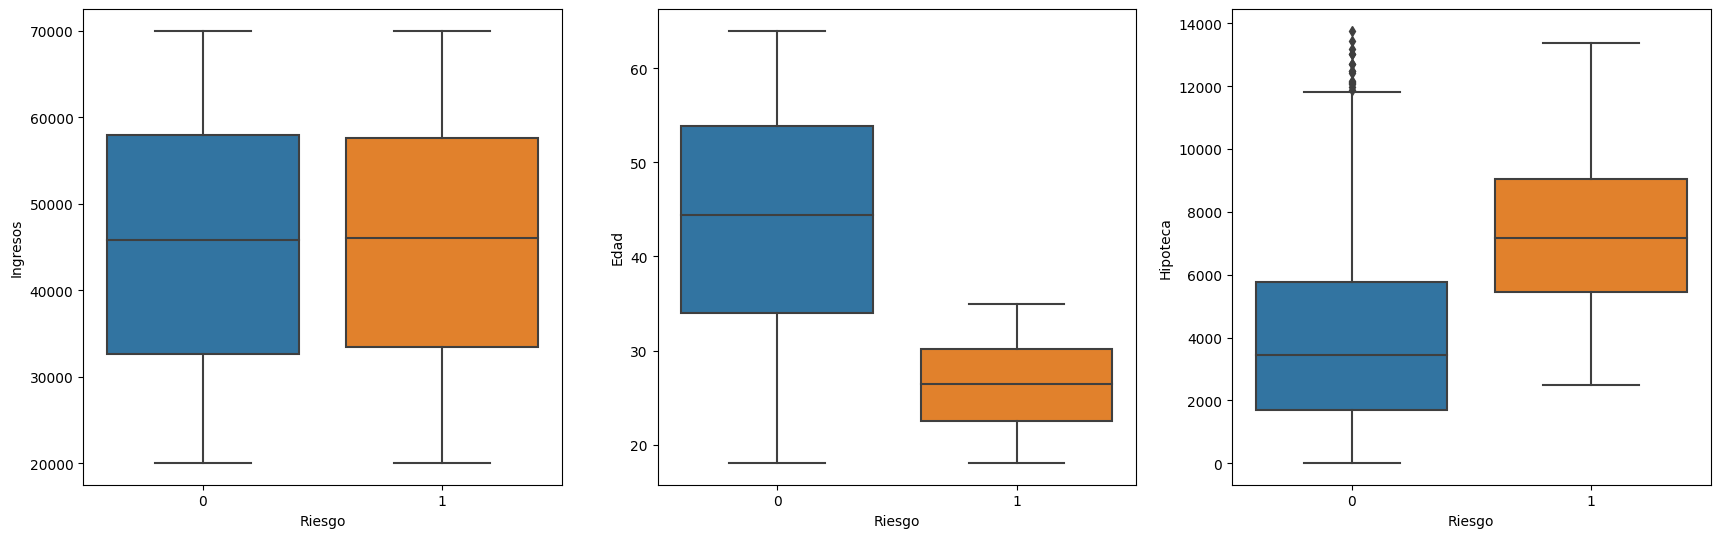

In [492]:
dataset_numericas = dataset.select_dtypes('float64')

plt.rcParams['figure.figsize'] = (21,21)
for i, col in enumerate(dataset_numericas.columns, 1):
    plt.subplot(3,3,i) 
    ax = sns.boxplot(y = col , x = "Riesgo", data = dataset)

Vemos que no hay valores exageradamente desprendidos de los diagramas como para eliminarlos

# Entrenamiento y clasificacion

In [494]:
# Definimos la columna de salida, ya que hacemos un aprendizaje supervisado

y = dataset['Riesgo']
X = dataset.drop('Riesgo', axis=1)

In [495]:
# Dividimos el dataset en dos, entrenamiento y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)

# shuffle mezcla los datos, anteriormente ya lo habiamos hecho, pero no esta de mas

# Seleccion del modelo

In [421]:
# DataFrame para una evaluación general al final
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','MCC score','Time to Train','Time to Predict','Total Time'])

In [507]:
def muestra_metricas(model_name, y_test, y_predic, start_time=None, end_train_time=None, end_predict_time=None):
    """
    Función simple para personalizar las métrica a imprimir para cada modelo analizado.
    model_name: string con el nombre del modelo
    y_test: recibe el vector de salida real
    y_predic: recibe el vector de salida predicho por el modelo
    """

    accuracy = accuracy_score(y_test, y_predic)
    recall = recall_score(y_test, y_predic, average='weighted') # average permite definir cómo se computan estas métricas para múltiples clases de salida
    precision = precision_score(y_test, y_predic, average='weighted')
    f1s = f1_score(y_test, y_predic, average='weighted')
    MCC = matthews_corrcoef(y_test, y_predic)

    print("#######################################")
    print("Accuracy: "+ "{:.2%}".format(accuracy))
    print("Recall: "+ "{:.2%}".format(recall))
    print("Precision: "+ "{:.2%}".format(precision))
    print("F1-Score: "+ "{:.2%}".format(f1s))
    print("MCC: "+ "{:.2%}".format(MCC))    # Matthews correlation coefficient: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html

    if (start_time != None and end_train_time != None and end_predict_time != None):
        print("Tiempo de entrenamiento: {:.4f} s".format(end_train_time-start_time))
        print("Tiempo de predicción: {:.4f} s".format(end_predict_time-end_train_time))
        print("Tiempo total: {:.4f} s".format(end_predict_time-start_time))
    
    print("#######################################")
    model_performance.loc[model_name] = [accuracy, recall, precision, f1s, MCC, end_train_time-start_time, end_predict_time-end_train_time, end_predict_time-start_time]


def plot_confusion_matrix(y_true, y_preds, labels=None, model_name=None, normalize=None):
    """
    Función para graficar la Matrix de confusión
    y_true: vector de salida real
    y_predic: vector de salida predicho por el modelo
    labels: opcional, para nombrar las clases. Lista con strings
    model_name: opcional, para poner un título al gráfico
    normalize: {'true', 'pred', 'all'}, default=None
        Normalizes confusion matrix over the true (rows), predicted (columns)
        conditions or all the population. If None, confusion matrix will not be
        normalized.
    """
    if normalize:
        cm = confusion_matrix(y_true, y_preds, normalize=normalize)
    else:
        cm = confusion_matrix(y_true, y_preds)
    cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
    cmd.plot()
    cmd.ax_.set(xlabel='Clase Predicha', ylabel='Clase Real')
    if model_name:
        cmd.ax_.set(title=model_name)

# Regresion Logistica

In [496]:
start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_lr = lr_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_lr))
muestra_metricas("LogisticRegression", y_test, pred_lr, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       506
           1       0.80      0.51      0.62        94

    accuracy                           0.90       600
   macro avg       0.86      0.74      0.78       600
weighted avg       0.90      0.90      0.89       600

#######################################
Accuracy: 90.33%
Recall: 90.33%
Precision: 89.68%
F1-Score: 89.42%
MCC: 59.00%
Tiempo de entrenamiento: 0.0151 s
Tiempo de predicción: 0.0025 s
Tiempo total: 0.0175 s
#######################################


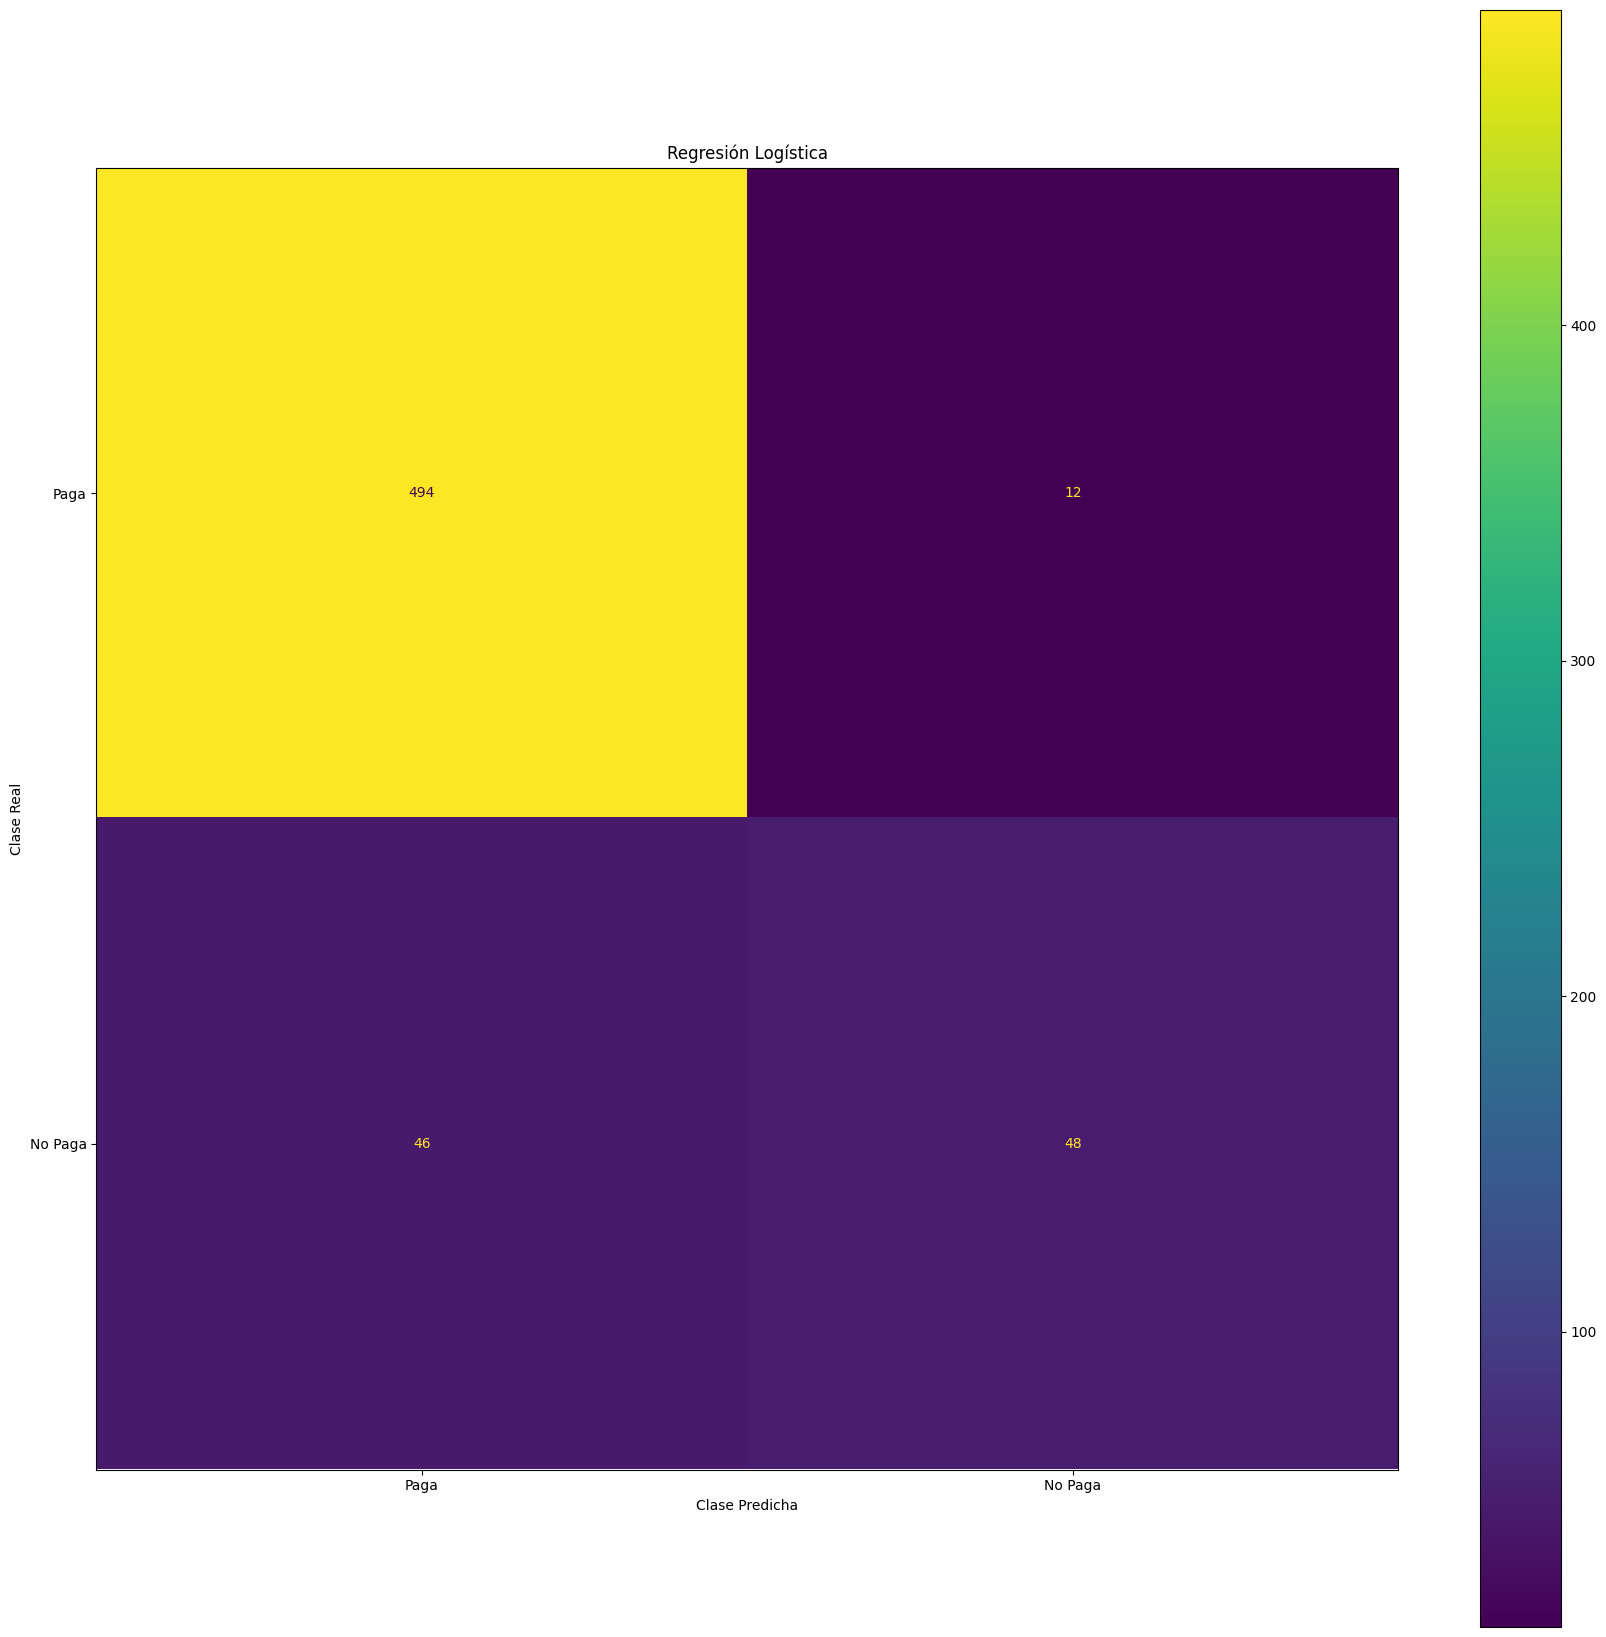

In [508]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_lr, labels=["Paga", "No Paga"], model_name="Regresión Logística")

# Arbol de Decision

In [509]:
start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_tree = tree_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_tree))
muestra_metricas("DecisionTreeClassifier", y_test, pred_tree, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       506
           1       0.94      0.98      0.96        94

    accuracy                           0.99       600
   macro avg       0.97      0.98      0.98       600
weighted avg       0.99      0.99      0.99       600

#######################################
Accuracy: 98.67%
Recall: 98.67%
Precision: 98.70%
F1-Score: 98.68%
MCC: 95.07%
Tiempo de entrenamiento: 0.0051 s
Tiempo de predicción: 0.0021 s
Tiempo total: 0.0071 s
#######################################


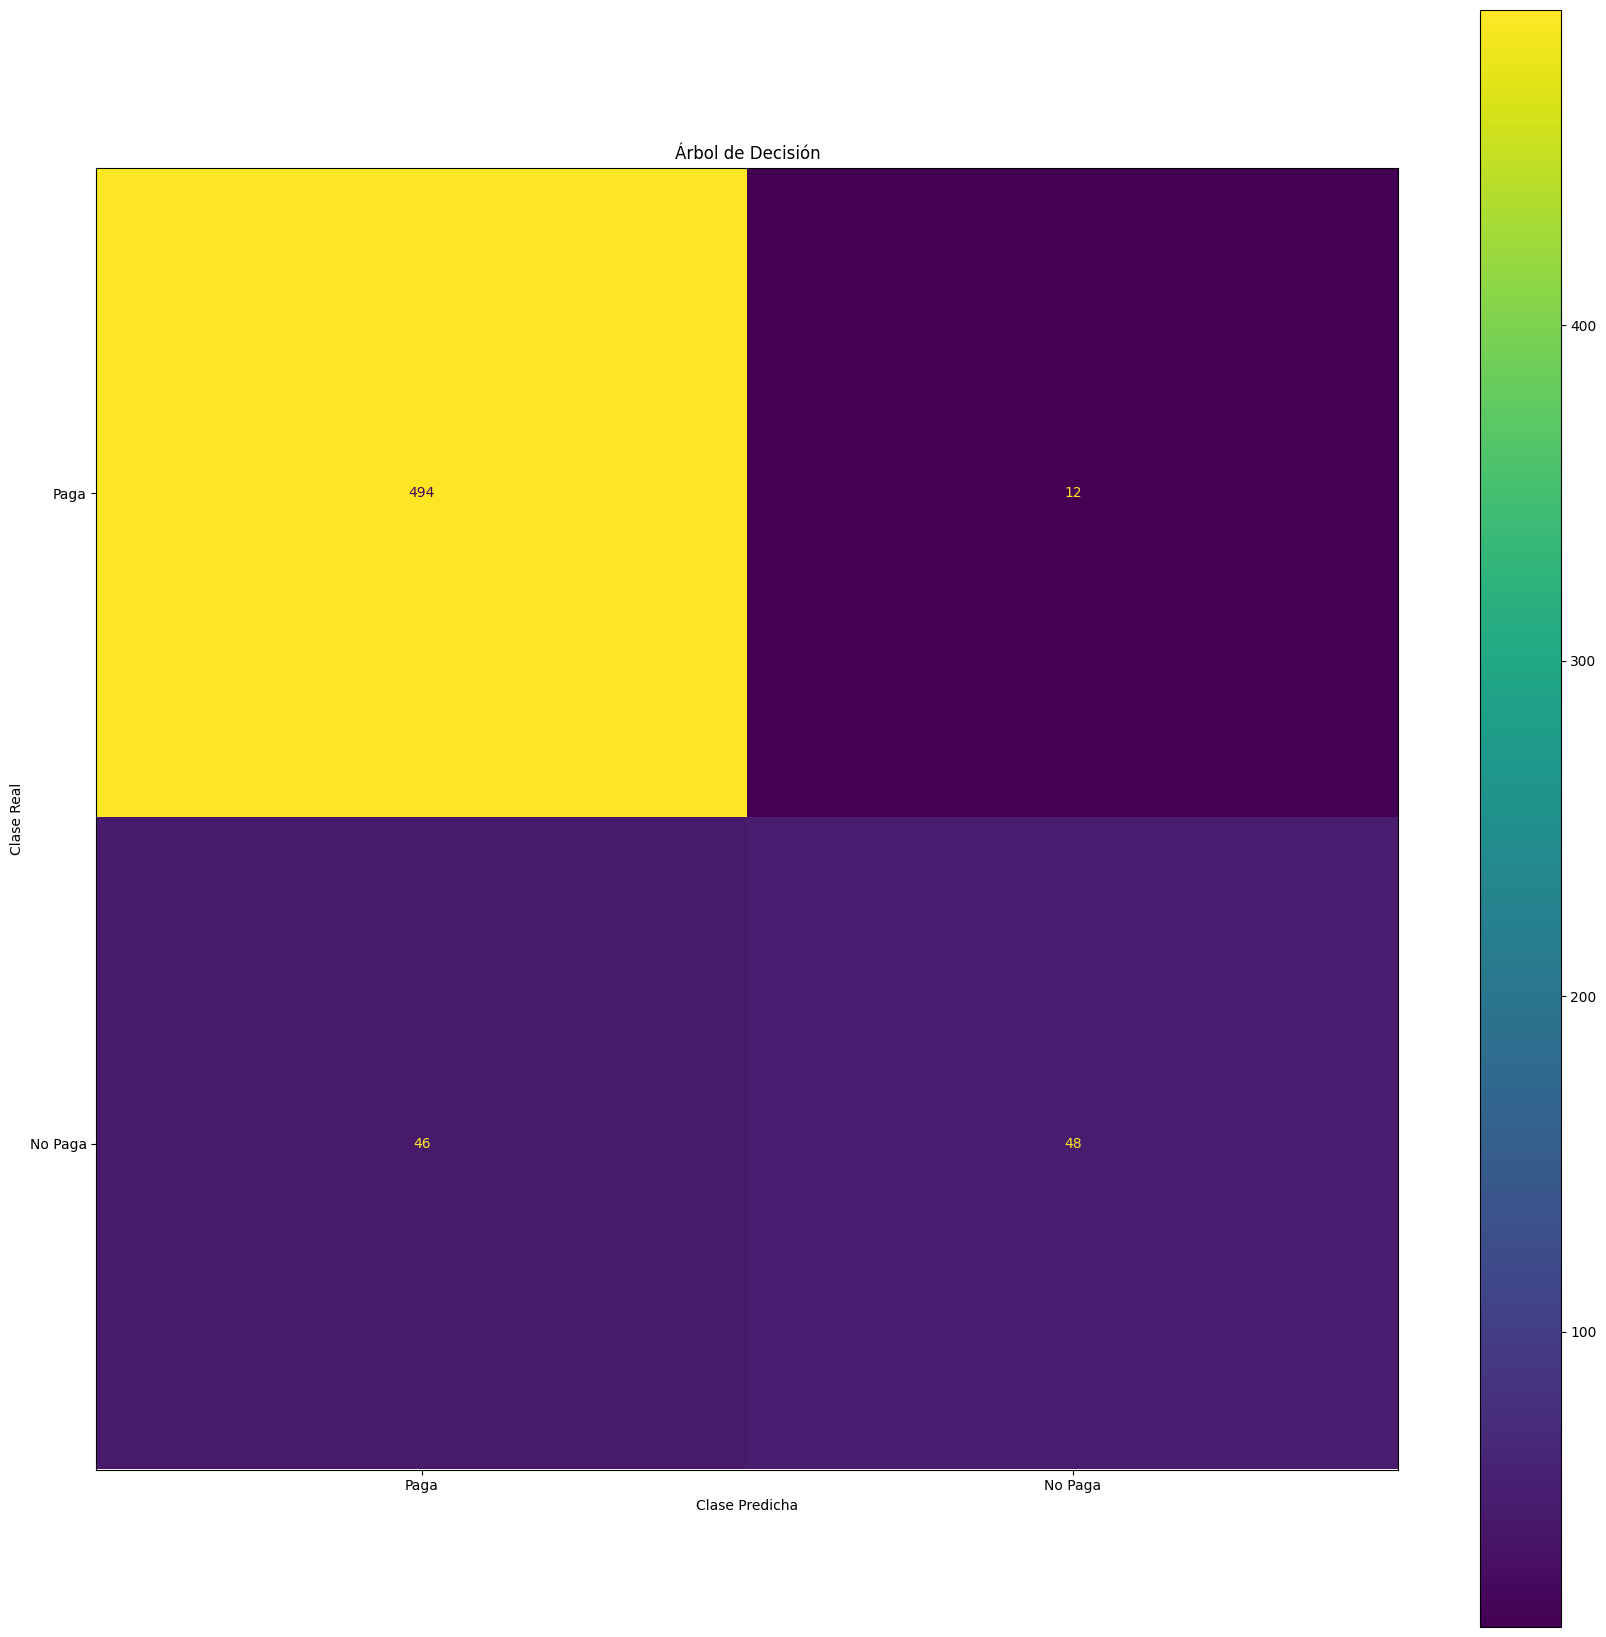

In [510]:
plot_confusion_matrix(y_test, pred_tree, labels=["Paga", "No Paga"], model_name="Árbol de Decisión")

# K Vecinos Cercanos

In [512]:
start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_knn = knn_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_knn))
muestra_metricas("KNeighborsClassifier", y_test, pred_knn, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       506
           1       0.40      0.19      0.26        94

    accuracy                           0.83       600
   macro avg       0.63      0.57      0.58       600
weighted avg       0.79      0.83      0.80       600

#######################################
Accuracy: 82.83%
Recall: 82.83%
Precision: 79.05%
F1-Score: 80.20%
MCC: 19.06%
Tiempo de entrenamiento: 0.0038 s
Tiempo de predicción: 0.0189 s
Tiempo total: 0.0227 s
#######################################


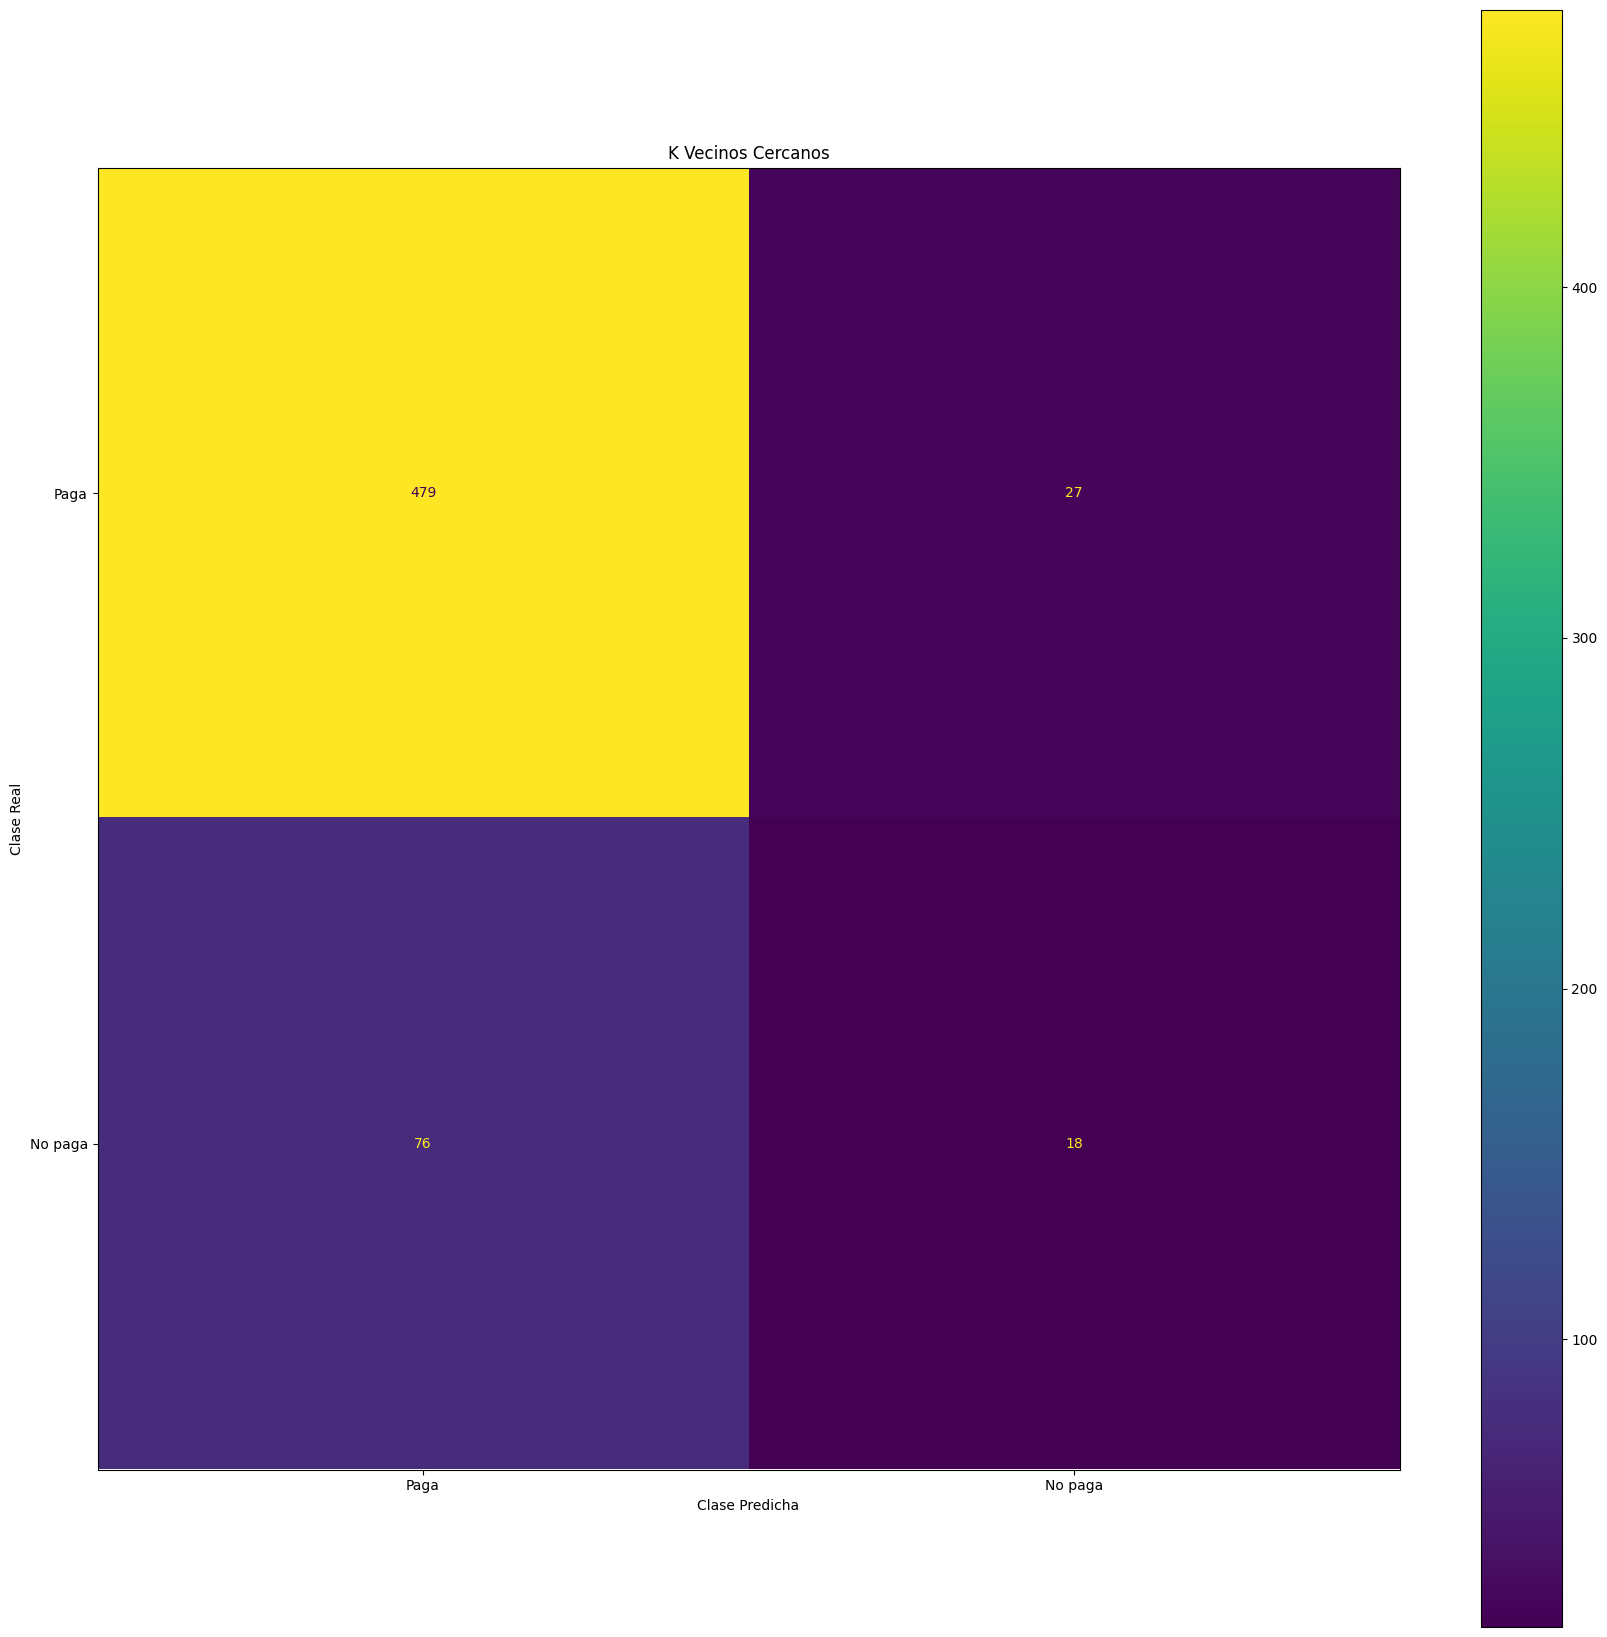

In [513]:
plot_confusion_matrix(y_test, pred_knn, labels=["Paga", "No paga"], model_name="K Vecinos Cercanos")

# eXtreme Gradient Boosting (XGB)

In [514]:
# Si aparece: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]
# Significa que este clasificador necesita que la codificación de las clases de salida comiencen por 0
# Esta transformación la podemos realizar de manera sencilla

le = LabelEncoder()
y_train_transformed = le.fit_transform(y_train)

# El la salida para test también debería de transformarse, sino se comprara cosas distintas
y_test_transformed = le.fit_transform(y_test)

In [515]:
start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
xgbc_clf = XGBClassifier()
xgbc_clf.fit(X_train, y_train_transformed)
end_train = time.time()

# Predicciones
pred_xgbc = xgbc_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test_transformed, pred_xgbc))
muestra_metricas("XGBClassifier", y_test_transformed, pred_xgbc, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       506
           1       0.95      0.95      0.95        94

    accuracy                           0.98       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.98      0.98      0.98       600

#######################################
Accuracy: 98.33%
Recall: 98.33%
Precision: 98.33%
F1-Score: 98.33%
MCC: 93.69%
Tiempo de entrenamiento: 0.0651 s
Tiempo de predicción: 0.0025 s
Tiempo total: 0.0677 s
#######################################


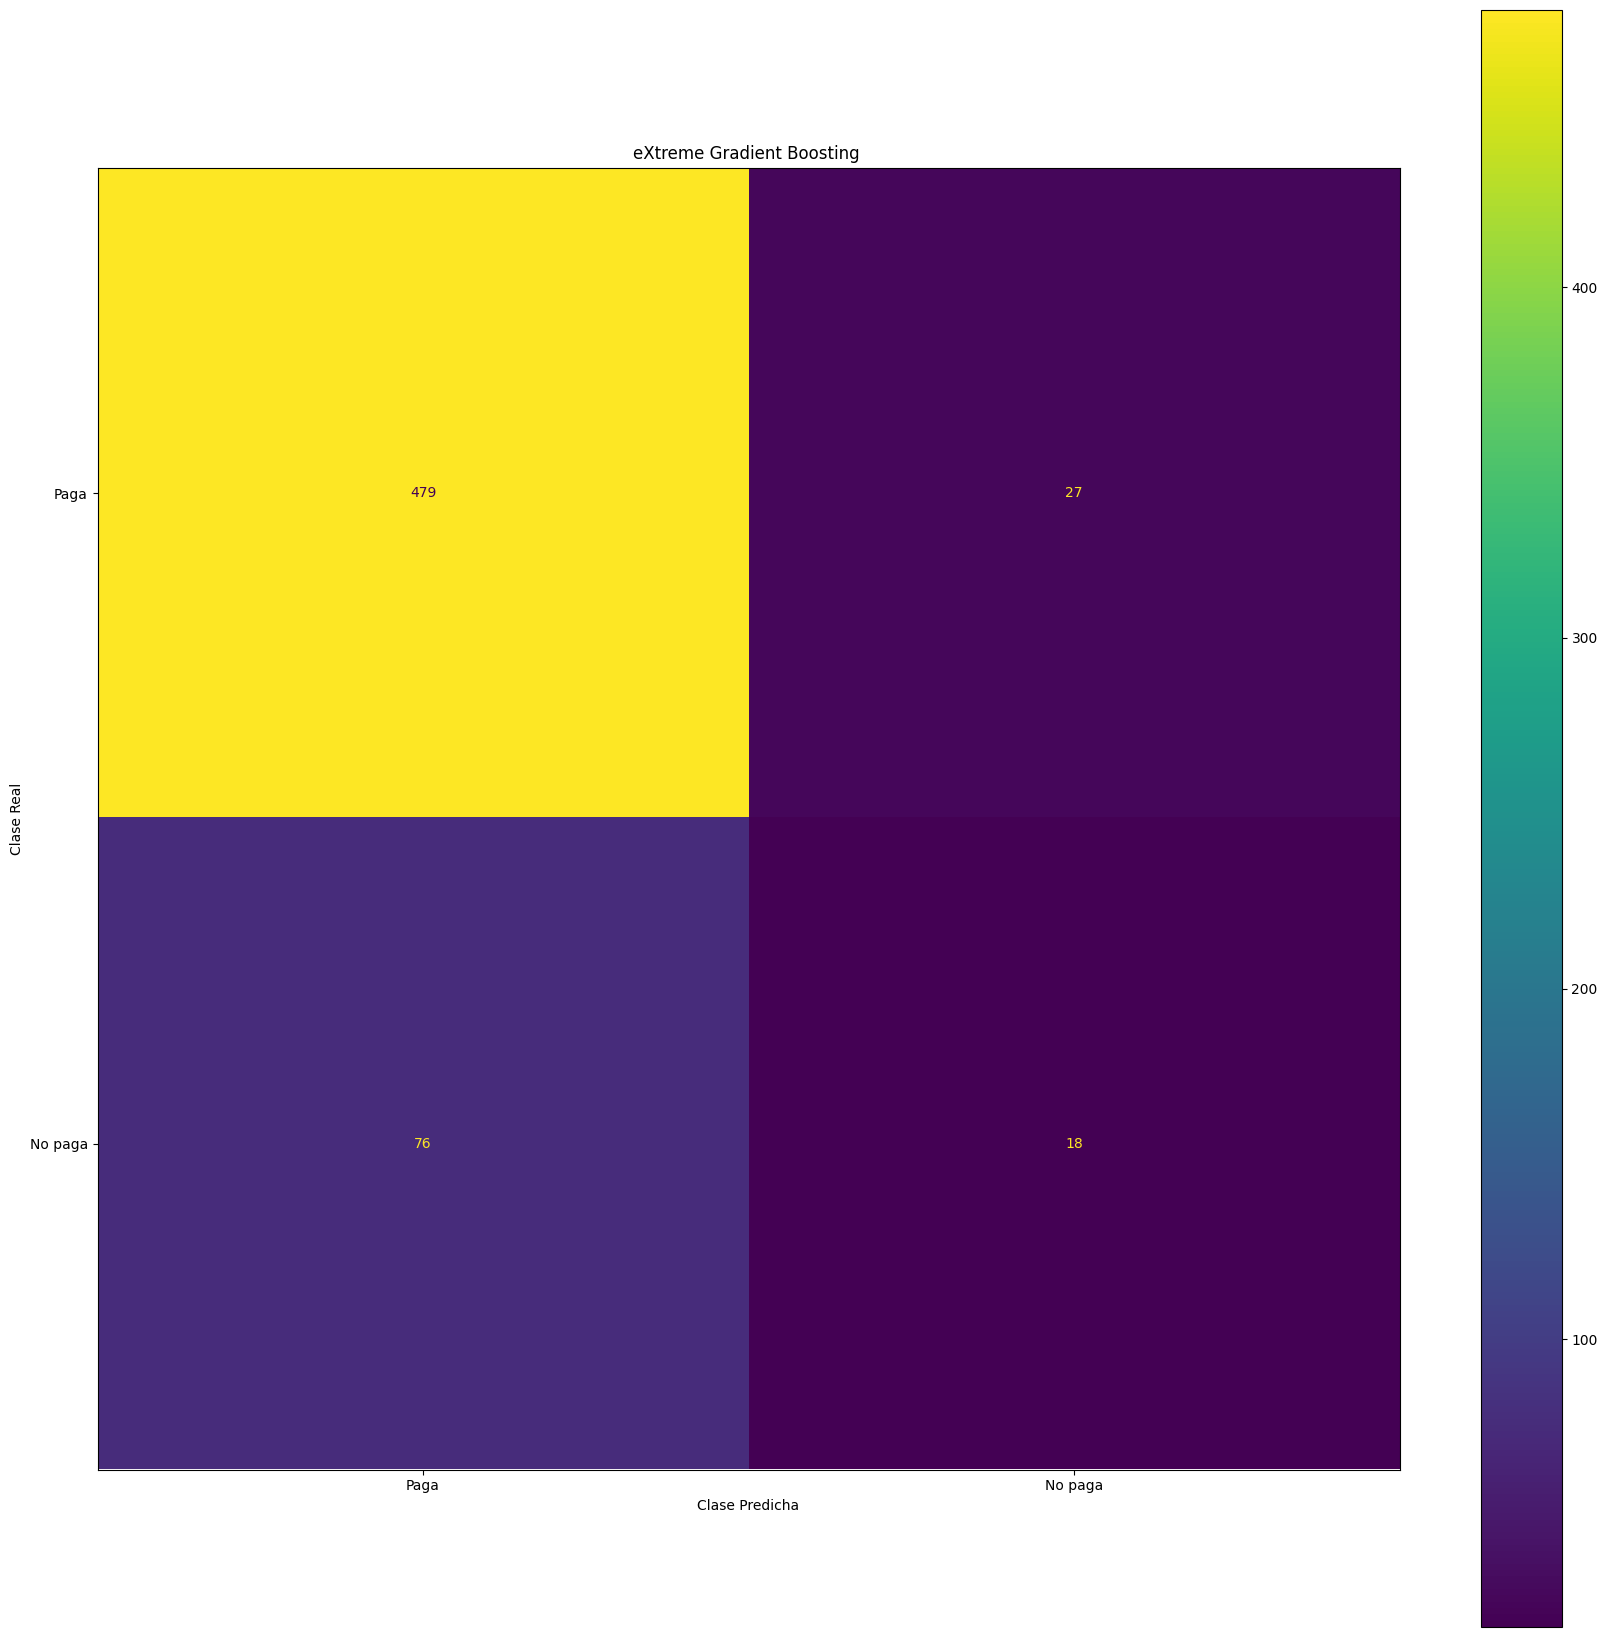

In [516]:
plot_confusion_matrix(y_test, pred_knn, labels=["Paga", "No paga"], model_name="eXtreme Gradient Boosting ")

# Red Neuronal

In [517]:
start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
# Por ahora... un perceptrón multicapa simple, después vemos topologías complejas
nn_clf = MLPClassifier((50,))  # hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
                                # The ith element represents the number of neurons in the ith hidden layer.
nn_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_nn = nn_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_nn))
muestra_metricas("Multi-layer Perceptron classifier", y_test, pred_nn, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.50      0.66       506
           1       0.27      1.00      0.42        94

    accuracy                           0.57       600
   macro avg       0.63      0.75      0.54       600
weighted avg       0.89      0.57      0.63       600

#######################################
Accuracy: 57.50%
Recall: 57.50%
Precision: 88.55%
F1-Score: 62.57%
MCC: 36.55%
Tiempo de entrenamiento: 0.2325 s
Tiempo de predicción: 0.0018 s
Tiempo total: 0.2343 s
#######################################


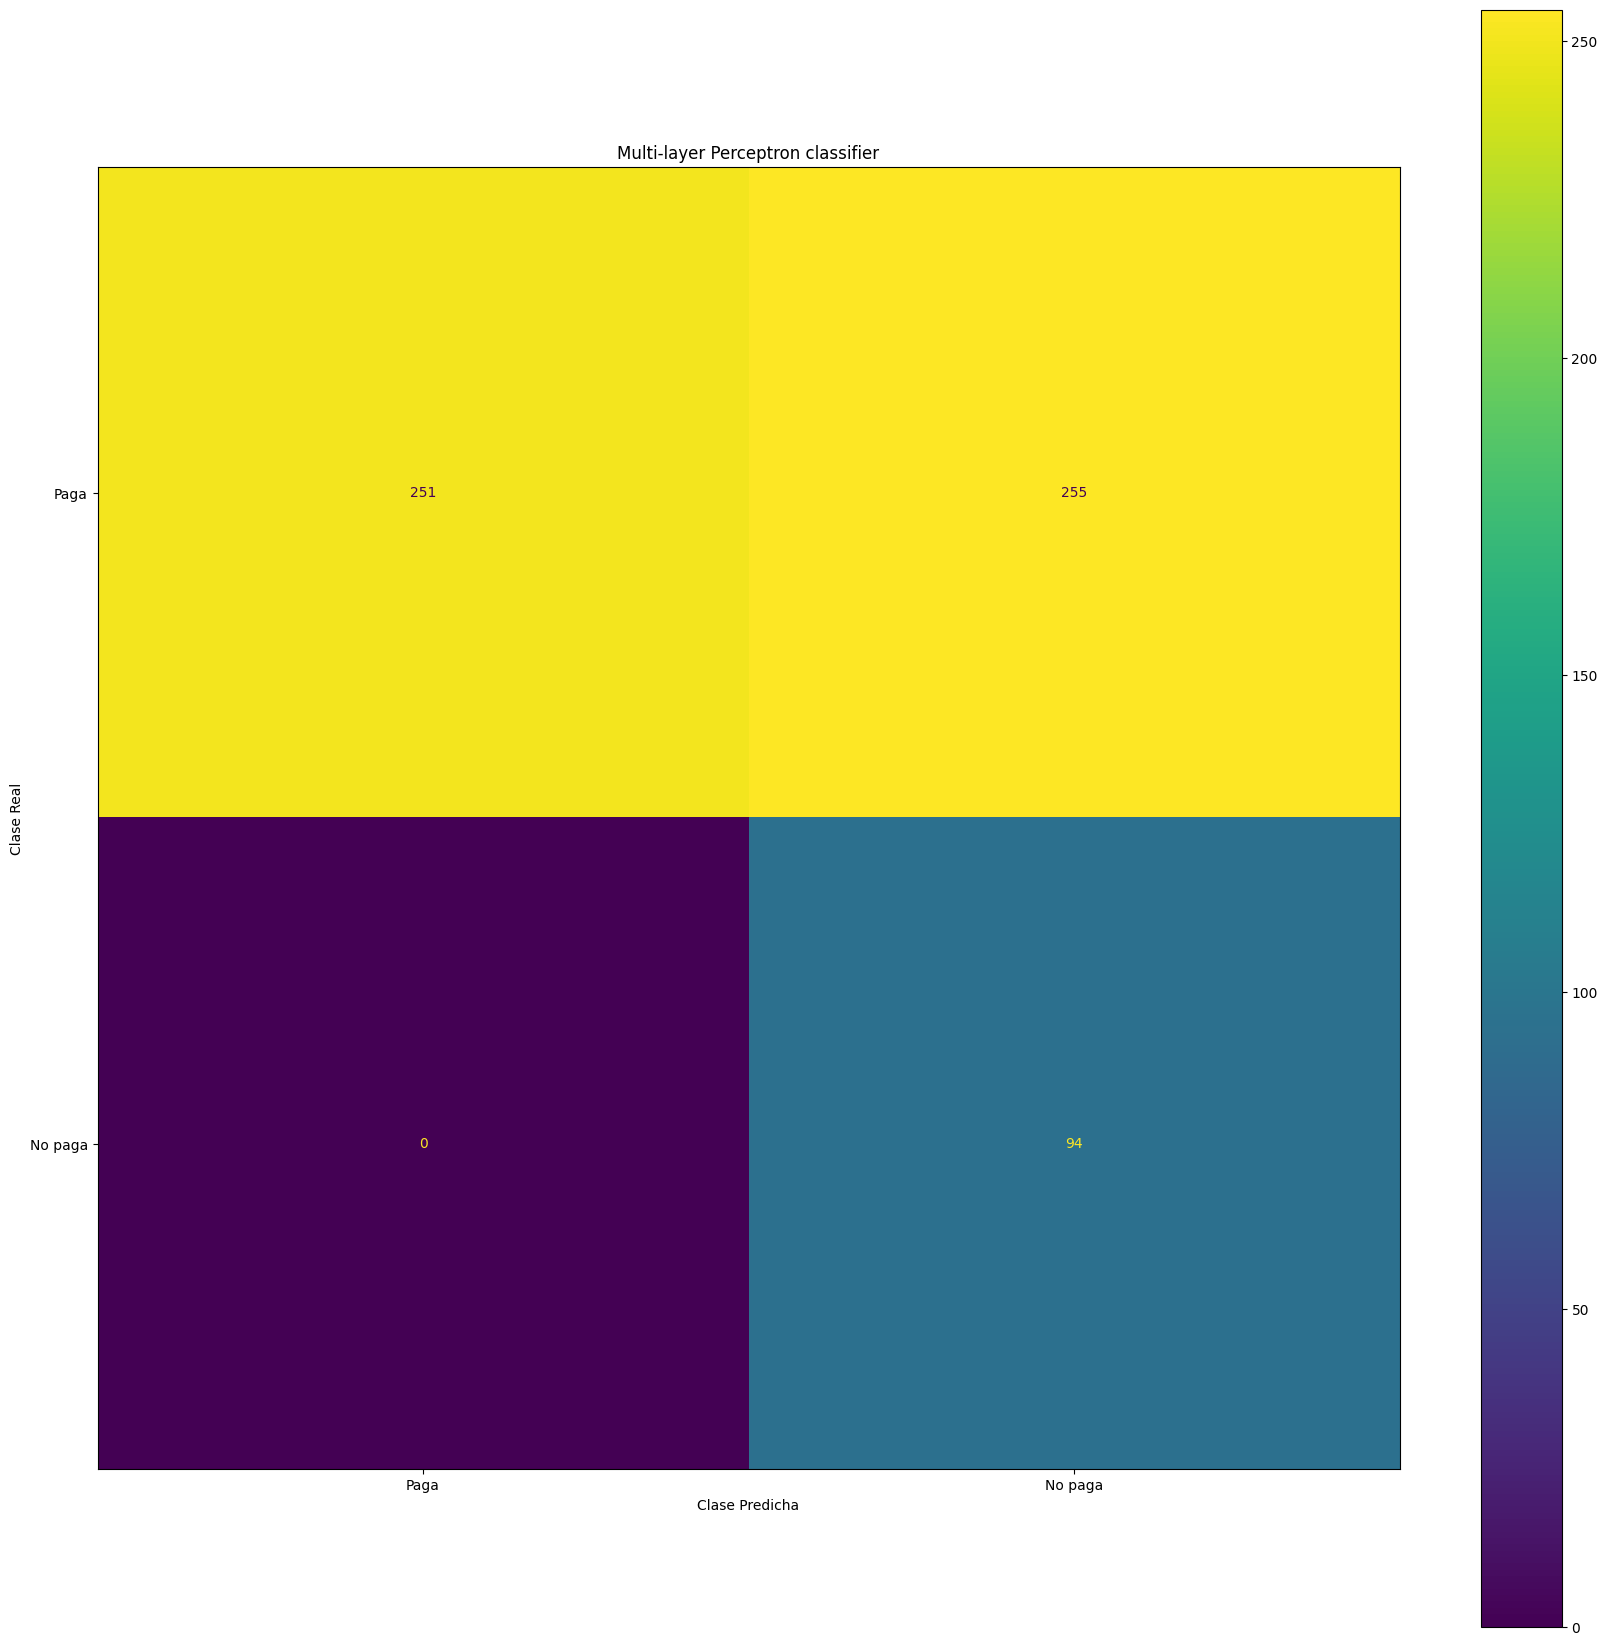

In [518]:
plot_confusion_matrix(y_test, pred_nn, labels=["Paga", "No paga"], model_name="Multi-layer Perceptron classifier")

# Comparacion de los Modelos

In [519]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'MCC score': '{:.2%}',
                                                                     'Time to Train':'{:.3f}',
                                                                     'Time to Predict':'{:.3f}',
                                                                     'Total Time':'{:.3f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,MCC score,Time to Train,Time to Predict,Total Time
LogisticRegression,90.33%,90.33%,89.68%,89.42%,59.00%,0.015,0.002,0.018
DecisionTreeClassifier,98.67%,98.67%,98.70%,98.68%,95.07%,0.005,0.002,0.007
KNeighborsClassifier,82.83%,82.83%,79.05%,80.20%,19.06%,0.004,0.019,0.023
XGBClassifier,98.33%,98.33%,98.33%,98.33%,93.69%,0.065,0.003,0.068
Multi-layer Perceptron classifier,57.50%,57.50%,88.55%,62.57%,36.55%,0.232,0.002,0.234


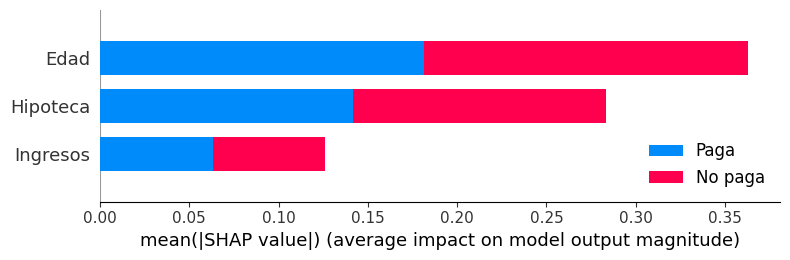

In [520]:
# Para modelos basados en Árboles
explainer = shap.TreeExplainer(tree_clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names=["Paga", "No paga"])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


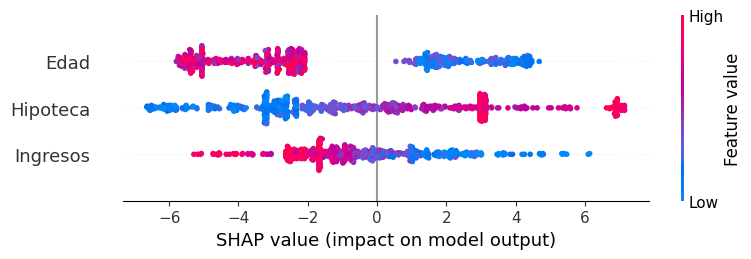

In [521]:
# Para modelos basados en Árboles
explainer = shap.TreeExplainer(xgbc_clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names=["Paga", "No paga"])